**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [5]:
#@ INSTALLING DEPENDENCIES FOR DATASET: UNCOMMENT BELOW: 
# ! pip install rarfile av
# ! pip install -Uq pyopenssl

In [6]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastbook import *                             # Getting all the Libraries. 
from fastai.callback.fp16 import *
from fastai.vision.all import *                    # Getting all the Libraries.

from rarfile import RarFile
import av

**UCF101 ACTION RECOGNITION:**
- **UCF101** is an action recognition dataset of realistic action videos, collected from YouTube, having 101 action categories. This dataset is an extension of UCF50 dataset which has 50 action categories. It is the most challenging dataset to date. 

In [8]:
#@ GETTING THE DATASET: UNCOMMENT BELOW: 
# !wget -P ~/.fastai/archive/ --no-check-certificate  https://www.crcv.ucf.edu/data/UCF101/UCF101.rar 

In [9]:
#@ DEFINING FUNCTION TO UNRAR DATASET: 
def unrar(fname, dest):                                             # Defining Function. 
    dest = URLs.path(c_key="data")/fname.name.withsuffix('') if \
           dest is None else dest
    print(f"extracting to: {dest}")                                 # Inspection. 
    if not dest.exists():
        fname = str(fname)
        if fname.endswith("rar"):
            with RarFile(fname, "r") as myrar:
                myrar.extractall(dest.parent)                       # Initializing Extraction. 
        else:
            raise Exception(f"Unrecognized archive: {fname}")       # Exception. 
    return dest

#@ GETTING THE DATASET: 
ucf_fname = Path.home()/".fastai/archive/UCF101.rar"                # Initializing FilePath. 
dest = Path.home()/"/content/data/UCF101"                           # Initializing DestinationPath. 
path = unrar(ucf_fname, dest)                                       # Getting Dataset. 

extracting to: /content/data/UCF101


In [10]:
#@ GETTING THE DATASET:
path = Path("/content/data/UCF-101")                   # Initializing Dataset. 
path.ls()                                              # Inspection. 

(#101) [Path('/content/data/UCF-101/PlayingFlute'),Path('/content/data/UCF-101/PommelHorse'),Path('/content/data/UCF-101/BalanceBeam'),Path('/content/data/UCF-101/CliffDiving'),Path('/content/data/UCF-101/FieldHockeyPenalty'),Path('/content/data/UCF-101/SkateBoarding'),Path('/content/data/UCF-101/RockClimbingIndoor'),Path('/content/data/UCF-101/ShavingBeard'),Path('/content/data/UCF-101/IceDancing'),Path('/content/data/UCF-101/TennisSwing')...]

- The videos are in `.avi` format. I will convert each video to a sequence of images using video reader of torch vision.  

In [11]:
#@ PREPARING DATASET:
video_paths = get_files(path, extensions=".avi")       # Getting VideoPaths. 
video_paths[:4]                                        # Inspection. 

(#4) [Path('/content/data/UCF-101/PlayingFlute/v_PlayingFlute_g01_c01.avi'),Path('/content/data/UCF-101/PlayingFlute/v_PlayingFlute_g22_c03.avi'),Path('/content/data/UCF-101/PlayingFlute/v_PlayingFlute_g01_c03.avi'),Path('/content/data/UCF-101/PlayingFlute/v_PlayingFlute_g08_c06.avi')]

In [12]:
#@ FUNCTION TO CONVERT VIDEO TO IMAGES: 
def extract_frames(video_path):                        # Defining Function. 
    video = av.open(str(video_path))                   # Initializing Video. 
    for frame in video.decode(0):
        yield frame.to_image()                         # Getting Images. 

#@ PREPARING DATASET:
frames = list(extract_frames(video_paths[0]))          # Implementation. 
frames[0:4]                                            # Inspection. 

[<PIL.Image.Image image mode=RGB size=320x240 at 0x7FA177DDA1D0>,
 <PIL.Image.Image image mode=RGB size=320x240 at 0x7FA177DDAAD0>,
 <PIL.Image.Image image mode=RGB size=320x240 at 0x7FA177DDA190>,
 <PIL.Image.Image image mode=RGB size=320x240 at 0x7FA177DDA5D0>]

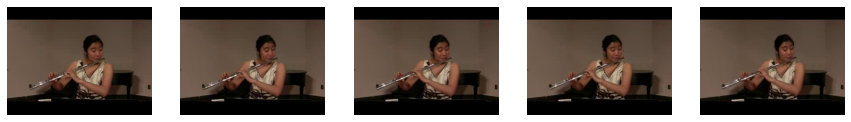

In [13]:
#@ INSPECTING IMAGEs:
show_images(frames[:5])

- I will export all videos to frames or images by defining a function that is capable of exporting one video to frames, and stores the resulting frames on a folder of the same name. 

In [16]:
#@ FUNCTION TO CONVERT VIDEOS TO FRAMES:
video_path = video_paths[0]                                         # Getting a Video. 
path_frames = path.parent/"UCF101-Frames"                           # Initialization. 
if not path_frames.exists(): path_frames.mkdir()                    # Initializing Directory. 

#@ FUNCTION TO CONVERT VIDEOS TO FRAMES:
def avi2frames(video_path, path_frames=path_frames, force=False):   # Defining Function. 
    dest_path = path_frames/video_path.relative_to(
        video_path.parent.parent).with_suffix('')                   # Initializing DestinationPath. 
    if not dest_path.exists() or force:
        dest_path.mkdir(parents=True, exist_ok=True)                # Initializing Directory. 
        for i, frame in enumerate(extract_frames(video_path)):
            frame.save(dest_path/f"{i}.jpg")

#@ IMPLEMENTATION OF FUNCTION: 
avi2frames(video_path)                                              # Initializing Function. 
(path_frames/video_path.relative_to(
    video_path.parent.parent).with_suffix('')).ls()                 # Inspection. 

(#253) [Path('/content/data/UCF101-Frames/PlayingFlute/v_PlayingFlute_g01_c01/103.jpg'),Path('/content/data/UCF101-Frames/PlayingFlute/v_PlayingFlute_g01_c01/194.jpg'),Path('/content/data/UCF101-Frames/PlayingFlute/v_PlayingFlute_g01_c01/57.jpg'),Path('/content/data/UCF101-Frames/PlayingFlute/v_PlayingFlute_g01_c01/20.jpg'),Path('/content/data/UCF101-Frames/PlayingFlute/v_PlayingFlute_g01_c01/139.jpg'),Path('/content/data/UCF101-Frames/PlayingFlute/v_PlayingFlute_g01_c01/162.jpg'),Path('/content/data/UCF101-Frames/PlayingFlute/v_PlayingFlute_g01_c01/173.jpg'),Path('/content/data/UCF101-Frames/PlayingFlute/v_PlayingFlute_g01_c01/163.jpg'),Path('/content/data/UCF101-Frames/PlayingFlute/v_PlayingFlute_g01_c01/244.jpg'),Path('/content/data/UCF101-Frames/PlayingFlute/v_PlayingFlute_g01_c01/55.jpg')...]

In [ ]:
#@ CONVERTING VIDEOS TO FRAMES: 
parallel(avi2frames, video_paths)